In [1]:
# Parte 1 + 2a
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Dados\MICRODADOS_ENEM_2022.csv', sep= ';', encoding= 'ISO-8859-1')
filtro_treineiro = df['IN_TREINEIRO'] == 0
filtro_presenca_CN = df['TP_PRESENCA_CN'] == 1
filtro_presenca_CH = df['TP_PRESENCA_CH'] == 1
filtro_presenca_LC = df['TP_PRESENCA_LC'] == 1
filtro_presenca_MT = df['TP_PRESENCA_MT'] == 1
filtro_redacao= df['TP_STATUS_REDACAO'] == 1

filtros_agrupados = filtro_treineiro & filtro_presenca_CN & filtro_presenca_CH & filtro_presenca_LC & filtro_presenca_MT & filtro_redacao
df_filtrado = df[filtros_agrupados]

# agrupa por tipo (nesse caso pela renda) e faz a média das notas de cada competência, ai o gráfico fica renda por média de nota em cada competência
media_notas_por_renda = df_filtrado.groupby('Q006')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean()

C:\Users\esthe\AppData\Local\Temp\ipykernel_4232\57958615.py:27: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


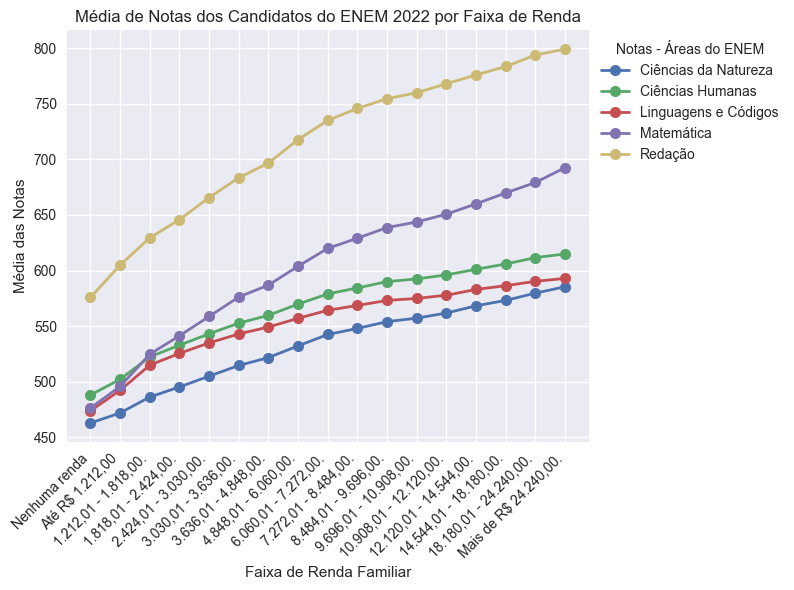

In [2]:
# # Mapeia os códigos das faixas de renda para os rótulos personalizados

faixas_de_renda = {
    'A': 'Nenhuma renda',
    'B': 'Até R$ 1.212,00',
    'C': '1.212,01 - 1.818,00.',
    'D': '1.818,01 - 2.424,00.',
    'E': '2.424,01 - 3.030,00.',
    'F': '3.030,01 - 3.636,00.',
    'G': '3.636,01 - 4.848,00.',
    'H': '4.848,01 - 6.060,00.',
    'I': '6.060,01 - 7.272,00.',
    'J': '7.272,01 - 8.484,00.',
    'K': '8.484,01 - 9.696,00.',
    'L': '9.696,01 - 10.908,00.',
    'M': '10.908,01 - 12.120,00.',
    'N': '12.120,01 - 14.544,00.',
    'O': '14.544,01 - 18.180,00.',
    'P': '18.180,01 - 24.240,00.',
    'Q': 'Mais de R$ 24.240,00.'
    
}

# # # Renomeia os índices do DataFrame com os rótulos personalizados
# media_notas_por_renda.rename(index=faixas_de_renda, inplace=True)

plt.style.use('seaborn')
plt.figure(figsize=(8,6))

# Cria o gráfico de linhas
media_notas_por_renda.plot(kind='line', marker='o', markersize=8, linewidth=2, ax=plt.gca())

# Configurações adicionais
plt.xlabel('Faixa de Renda Familiar')
plt.ylabel('Média das Notas')
plt.title('Média de Notas dos Candidatos do ENEM 2022 por Faixa de Renda')

# Legenda personalizada
legend_labels = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']
plt.legend(legend_labels, title='Notas - Áreas do ENEM', bbox_to_anchor=(1, 1))
labels_faixas = [faixas_de_renda[letra] for letra in media_notas_por_renda.index]
plt.xticks(range(len(labels_faixas)), labels_faixas, rotation=45, ha='right')
plt.tight_layout()

# Exibe o gráfico
plt.show()

In [3]:
# Parte 2b
media_disciplina = media_notas_por_renda
media_das_medias = media_disciplina.mean()
desvio_padrao = media_disciplina.std()
d_cohen = (media_disciplina - media_das_medias) / desvio_padrao


C:\Users\esthe\AppData\Local\Temp\ipykernel_4232\2151158421.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


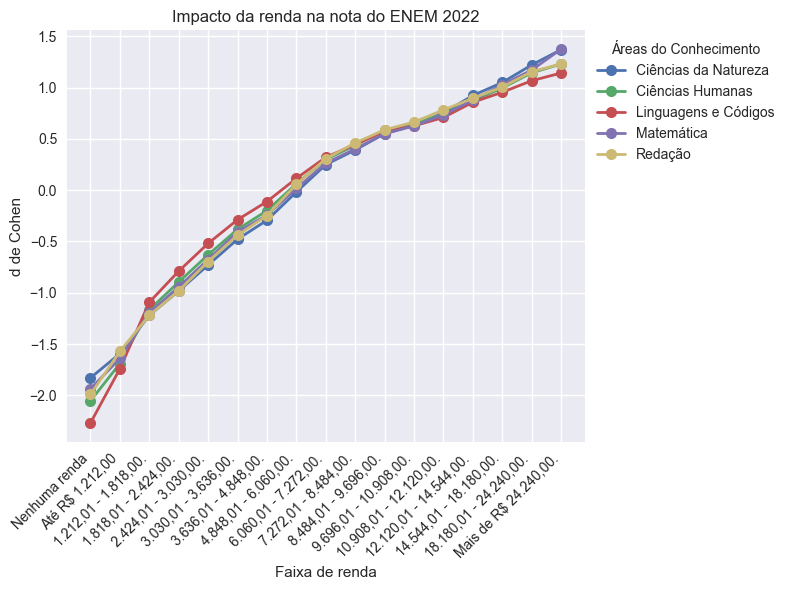

In [28]:


plt.style.use('seaborn')
plt.figure(figsize=(8,6))
d_cohen.plot(kind='line', marker='o', markersize=8, linewidth=2, ax=plt.gca())

plt.xlabel('Faixa de renda')
plt.ylabel('d de Cohen')
plt.title('Impacto da renda na nota do ENEM 2022')

legend_labels = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']
plt.legend(legend_labels, title='Áreas do Conhecimento', bbox_to_anchor=(1, 1))
labels_faixas = [faixas_de_renda[letra] for letra in d_cohen.index]
plt.xticks(range(len(labels_faixas)), labels_faixas, rotation=45, ha='right')
plt.tight_layout() 

plt.show()

In [21]:
# Parte 3
# Contas 

filtro_computadores_nenhum = df_filtrado['Q024'] == 'A'
filtro_computadores_tem = (df_filtrado['Q024'] == 'C') | (df_filtrado['Q024'] == 'B') | (df_filtrado['Q024'] == 'D') | (df_filtrado['Q024'] == 'E')
filtro_computadores = filtro_computadores_nenhum | filtro_computadores_tem
df_computadores = df_filtrado[filtro_computadores]
df_filtrado_computadores_nenhum = df_filtrado[filtro_computadores_nenhum]
df_filtrado_computadores_tem = df_filtrado[filtro_computadores_tem]
medias_computadores = df_computadores.groupby('Q006')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean()
medias_computadores_nenhum = df_filtrado_computadores_nenhum.groupby('Q006')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean()
medias_computadores_tem = df_filtrado_computadores_tem.groupby('Q006')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean()



In [12]:
medias_computadores_nenhum.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
Q006,,,,,
A,457.636377,481.508601,466.550879,468.018490,567.703949
B,465.288083,493.579172,483.688459,485.375266,592.698570
C,475.131933,509.170125,502.852490,508.251289,609.691139
D,480.856808,516.337788,511.179227,519.829009,620.818841
E,486.785348,523.527705,518.030708,531.818844,633.172269


In [22]:
medias_computadores_tem.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
Q006,,,,,
A,488.202084,519.983313,509.119549,517.029225,615.325408
B,489.034315,524.254800,514.425215,522.488013,636.359997
C,497.835515,536.088897,527.485843,541.880839,649.886973
D,504.219934,543.054520,534.342463,554.524731,661.134630
E,512.197249,550.811931,541.627723,569.280932,678.383318


In [23]:

media_geral = medias_computadores.mean()
desvio_geral = medias_computadores.std()

# Nenhum computador
media_disciplina_0pc = medias_computadores_nenhum

d_cohen_0pc = (media_disciplina_0pc - media_geral) / desvio_geral
df_0pc = pd.DataFrame(d_cohen_0pc, index=faixas_de_renda)

# Um ou mais computadores
media_disciplina_tem = medias_computadores_tem
d_cohen_tem = (media_disciplina_tem - media_geral) / desvio_geral
df_tem = pd.DataFrame(d_cohen_tem, index=faixas_de_renda)




C:\Users\esthe\AppData\Local\Temp\ipykernel_4232\1329794512.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Figure size 800x550 with 0 Axes>

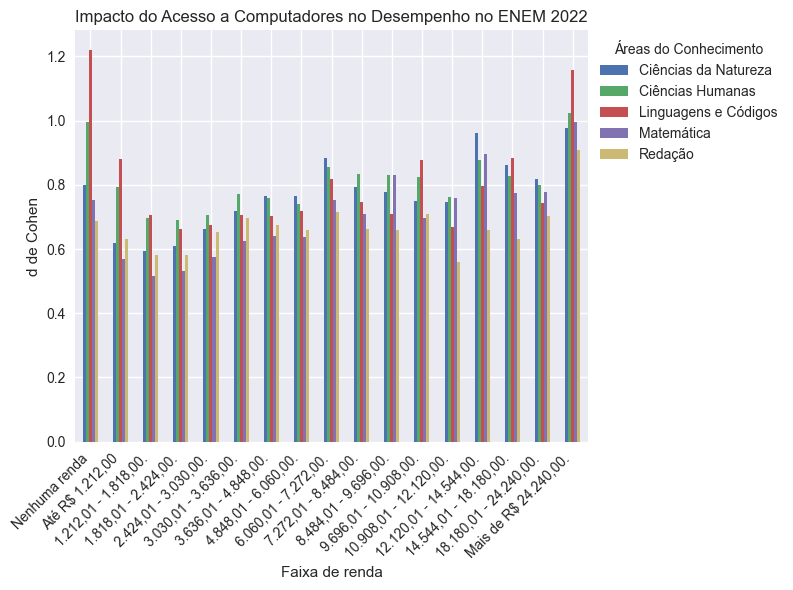

In [29]:




plt.style.use('seaborn')
plt.figure()
(d_cohen_tem-d_cohen_0pc).plot.bar(figsize = (8,6))

labels_faixas = [faixas_de_renda[letra] for letra in d_cohen_tem.index]



plt.xlabel('Faixa de renda')
plt.ylabel('d de Cohen')
plt.title('Impacto do Acesso a Computadores no Desempenho no ENEM 2022')

legend_labels = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']
plt.legend(legend_labels, title='Áreas do Conhecimento', bbox_to_anchor=(1, 1))
plt.xticks(range(len(labels_faixas)), labels_faixas, rotation=45, ha='right')

plt.tight_layout() 

plt.show()
